In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('./dataset/datasey.csv')

In [4]:
df

,Aspect,DF,DR,DW,LULC,Lithology,NDVI,PC,Precip,TPI,TWI,Temp,landslides
0,3,0.069254,0.035005,0.014315,5,1,0.173361,0.587224,0.218354,0.526543,0.290753,0.281136,0
1,5,0.071177,0.027460,0.010122,1,1,0.171299,0.586731,0.218354,0.278454,0.346054,0.290516,0
2,8,0.073099,0.021709,0.010122,1,1,0.186739,0.587447,0.218354,0.507312,0.285807,0.296769,0
3,1,0.077518,0.009709,0.022634,1,1,0.178715,0.586936,0.256262,0.496910,0.271271,0.265503,0
4,1,0.079983,0.009709,0.020244,5,1,0.209991,0.587434,0.256262,0.574309,0.215632,0.284263,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3,0.032747,0.009709,0.041735,5,3,0.266863,0.587359,0.295823,0.456762,0.247791,0.533611,0
1048571,3,0.028845,0.000000,0.040489,2,3,0.278765,0.587318,0.295823,0.438375,0.354052,0.532048,0
1048572,7,0.025073,0.000000,0.041735,2,3,0.278819,0.587302,0.311260,0.430867,0.761399,0.532048,0
1048573,7,0.021500,0.009709,0.045268,2,3,0.296450,0.587338,0.311260,0.462425,0.722018,0.476550,0


In [5]:
df['landslides'].value_counts()

landslides
0    1041619
1       6051
2        760
3        114
4         21
5          4
7          2
6          2
9          1
8          1
Name: count, dtype: int64

In [6]:
# Group rare classes (4–9) into class 4 = "Other"
df['landslides'] = df['landslides'].apply(lambda x: x if x <= 3 else 4)

In [7]:
df['landslides'].value_counts()

landslides
0    1041619
1       6051
2        760
3        114
4         31
Name: count, dtype: int64

In [8]:
# EDA 
df.shape

(1048575, 13)

In [9]:
df.dtypes

Aspect          int64
DF            float64
DR            float64
DW            float64
LULC            int64
Lithology       int64
NDVI          float64
PC            float64
Precip        float64
TPI           float64
TWI           float64
Temp          float64
landslides      int64
dtype: object

In [10]:
df.isnull().sum()

Aspect        0
DF            0
DR            0
DW            0
LULC          0
Lithology     0
NDVI          0
PC            0
Precip        0
TPI           0
TWI           0
Temp          0
landslides    0
dtype: int64

In [11]:
df.describe()

,Aspect,DF,DR,DW,LULC,Lithology,NDVI,PC,Precip,TPI,TWI,Temp,landslides
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.434557e+00,9.472365e-02,4.226835e-02,5.223354e-02,2.308988e+00,2.358625e+00,4.397155e-01,5.872375e-01,1.094490e-01,4.448235e-01,4.976837e-01,4.107736e-01,7.664688e-03
std,2.281879e+00,7.870866e-02,4.243103e-02,5.060908e-02,1.268911e+00,1.159078e+00,2.013744e-01,1.509445e-03,7.690548e-02,7.524512e-02,2.097531e-01,1.069077e-01,1.003126e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.188039e-02,0.000000e+00,9.513710e-03,5.550000e-17,0.000000e+00,4.533611e-02,0.000000e+00
25%,2.000000e+00,3.130398e-02,9.708738e-03,1.431496e-02,2.000000e+00,1.000000e+00,2.888328e-01,5.869381e-01,6.454342e-02,4.043992e-01,2.911667e-01,3.342887e-01,0.000000e+00
50%,4.000000e+00,7.322520e-02,2.912621e-02,3.649613e-02,2.000000e+00,2.000000e+00,3.754887e-01,5.872289e-01,9.147091e-02,4.429559e-01,4.436813e-01,4.158416e-01,0.000000e+00
75%,6.000000e+00,1.388019e-01,5.905595e-02,7.299225e-02,2.000000e+00,3.000000e+00,5.638990e-01,5.875524e-01,1.276683e-01,4.857754e-01,6.895763e-01,4.921834e-01,0.000000e+00
max,8.000000e+00,4.530463e-01,3.885922e-01,4.565103e-01,6.000000e+00,5.000000e+00,1.000000e+00,7.813268e-01,1.000000e+00,9.162608e-01,9.962685e-01,1.000000e+00,4.000000e+00


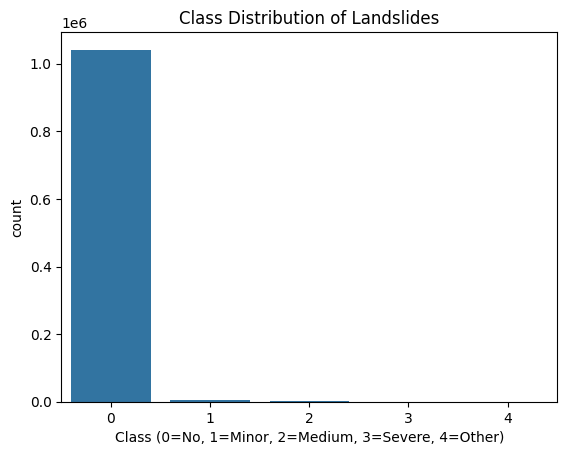

In [12]:
# class distribution
sns.countplot(x='landslides', data=df)
plt.title('Class Distribution of Landslides')
plt.xlabel("Class (0=No, 1=Minor, 2=Medium, 3=Severe, 4=Other)")
plt.show()

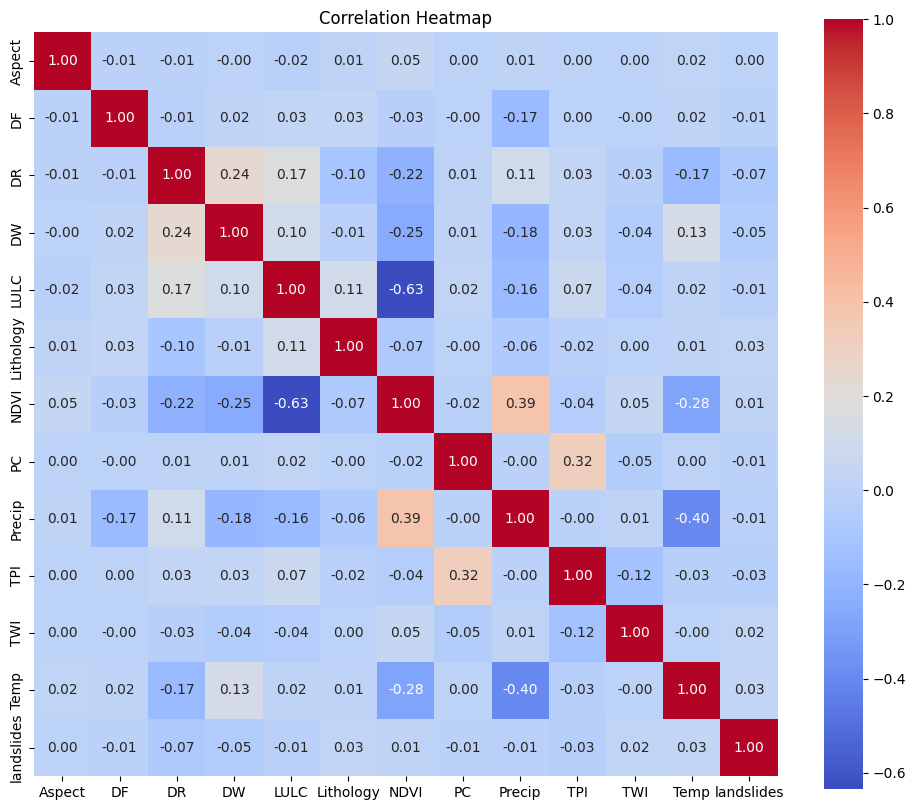

In [13]:
# correlation heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

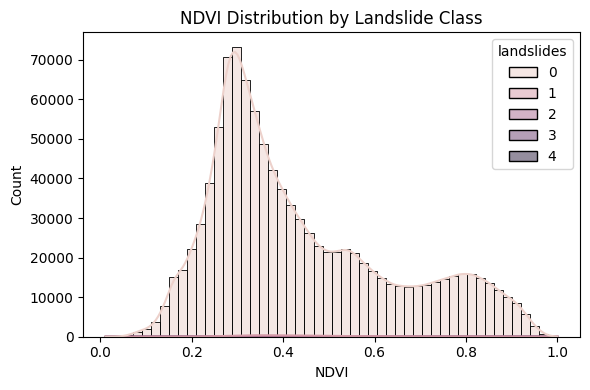

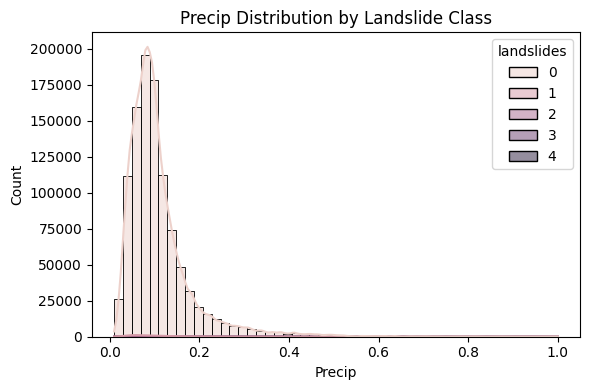

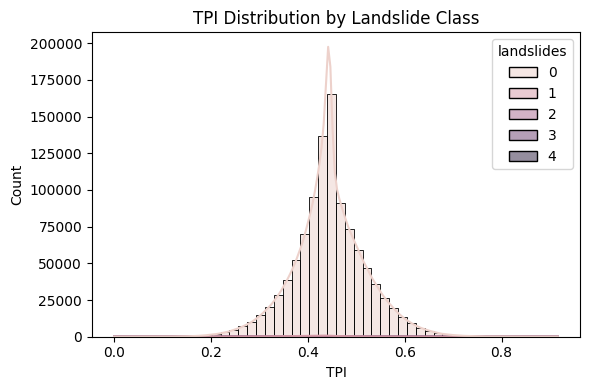

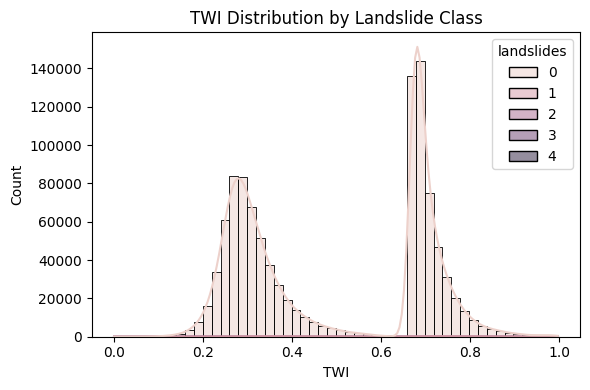

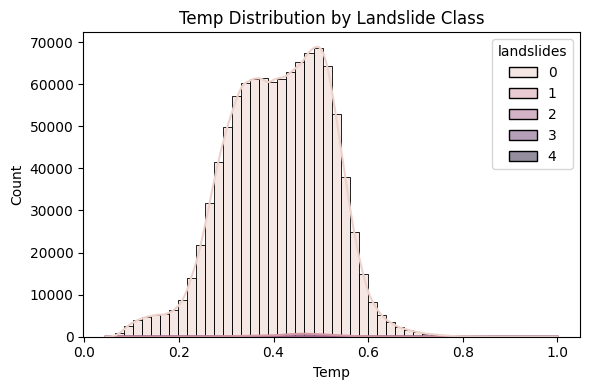

In [14]:
# Feature distributions
selected_features = ["NDVI", "Precip", "TPI", "TWI", "Temp"]

for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue="landslides", bins=50, kde=True)
    plt.title(f"{feature} Distribution by Landslide Class")
    plt.tight_layout()
    plt.show()

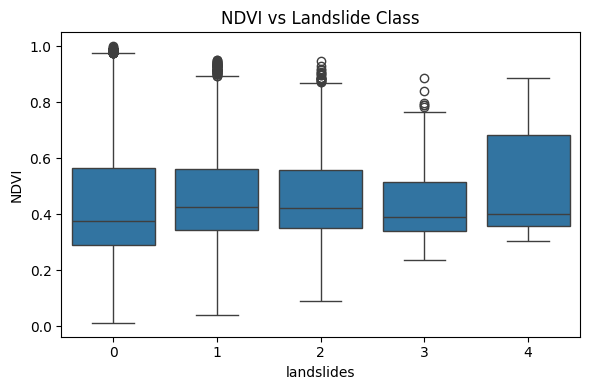

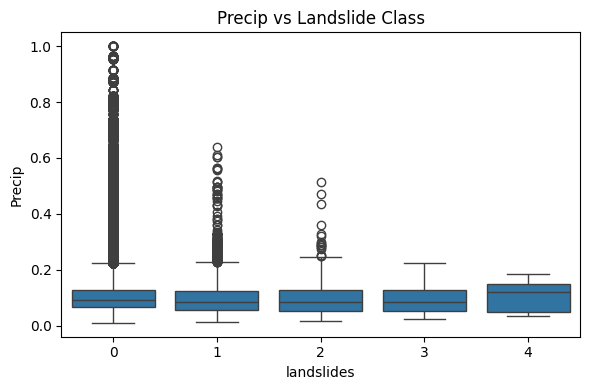

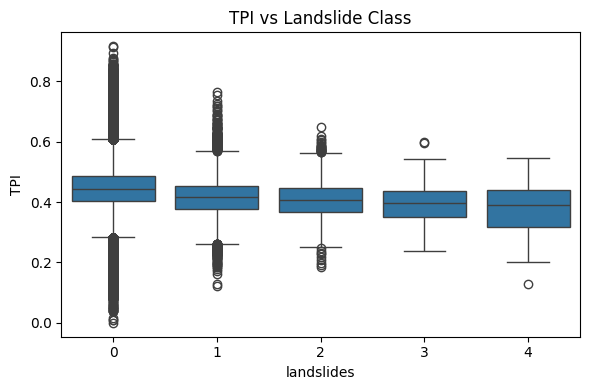

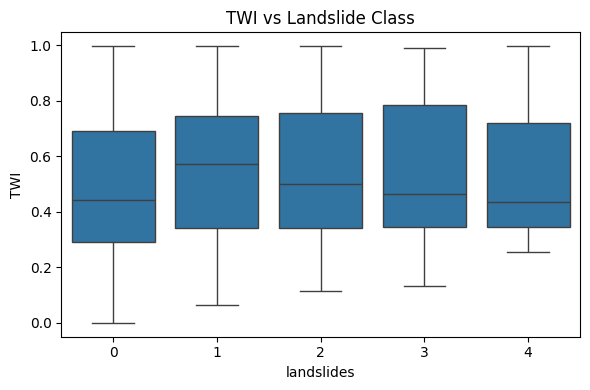

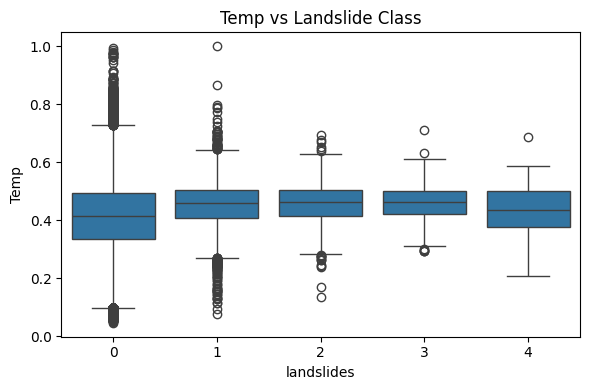

In [15]:
# Boxplots
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="landslides", y=feature, data=df)
    plt.title(f"{feature} vs Landslide Class")
    plt.tight_layout()
    plt.show()

In [16]:
# Preprocess the Data

# Split Features and Labels
X = df.drop('landslides', axis=1)
y = df['landslides']

In [17]:
# Feature Scaling using RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [19]:
# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:\n", pd.Series(y_train_resampled).value_counts())

Class distribution after SMOTE:
 landslides
0    833295
1    833295
4    833295
2    833295
3    833295
Name: count, dtype: int64


In [ ]:
# Train Models - Logistic Regression, Random Forest, XGBoost
models = {
    "Logistic": LogisticRegression(multi_class="multinomial", class_weight="balanced", max_iter=1000),
    "RandomForest": RandomForestClassifier(class_weight="balanced"),
    "XGBoost": XGBClassifier(objective="multi:softprob", num_class=5, eval_metric="mlogloss")
}


In [21]:
# evaluate models
from sklearn.metrics import classification_report, confusion_matrix

for name, model in models.items():
    print(f"🚀 Training {name}")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred))
    print("📉 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred)) 

🚀 Training Logistic


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84    208324
           1       0.01      0.22      0.02      1210
           2       0.00      0.30      0.01       152
           3       0.00      0.09      0.00        23
           4       0.00      0.33      0.00         6

    accuracy                           0.73    209715
   macro avg       0.20      0.33      0.18    209715
weighted avg       0.99      0.73      0.84    209715

📉 Confusion Matrix:
[[152381  21106   9566  14293  10978]
 [   162    263    296    277    212]
 [    12     27     46     33     34]
 [     2      4      5      2     10]
 [     0      1      3      0      2]]
🚀 Training RandomForest
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    208324
           1       0.15      0.09      0.11      1210
           2       0.05      0.01      0.02       152
         

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    208324
           1       0.07      0.28      0.11      1210
           2       0.01      0.11      0.03       152
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00         6

    accuracy                           0.97    209715
   macro avg       0.22      0.27      0.22    209715
weighted avg       0.99      0.97      0.98    209715

📉 Confusion Matrix:
[[202457   4579   1056    198     34]
 [   741    342     98     27      2]
 [    77     55     17      2      1]
 [    18      4      1      0      0]
 [     1      3      1      1      0]]
